<a href="https://colab.research.google.com/github/JamesLeeeeeee/first-contributions/blob/master/chapter_1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome

Tutorial on neural vocoder.

By Xin Wang, National Institute of Informatics, 2022.  See more in LICENSE Section.

This was used for ICASSP 2022 short course **Inclusive Neural Speech Synthesis**, **LECTURE 1, vocoder**.



### Full Table of contents:

* Introduction & basics:
  * [chapter_1_introduction.ipynb](https://colab.research.google.com/drive/1EO-ggi1U9f2zXwTiqg7AEljVx11JKta7?usp=sharing): entry point, and Python/Pytorch conventions used in this hands-on session;

  * [chapter_2_DSP_tools_Python.ipynb](https://colab.research.google.com/drive/1mZo73dbKeWr4hDHftDQI9rlDK1HyMf5C?usp=sharing): selected DSP tools for speech processing;

  * [chapter_3_DSP_tools_in_DNN_Pytorch.ipynb](https://colab.research.google.com/drive/1BEVR6jPFelczCPM5NZvuk8cRy8YpGacR?usp=sharing): selected DSP tools implemented as layers in neural networks;

* DSP-based Vocoder:
  * [chapter_4_DSP-based_Vocoder](https://colab.research.google.com/drive/19Ky2T3hIbHpGK57IQ0tAZc3pX6HLhs97?usp=sharing): traditional DSP-based vocoder included in [SPTK toolkit](https://github.com/sp-nitech/SPTK);

* Neural vocoders:
  * [chapter_5_DSP+DNN_NSF.ipynb](https://colab.research.google.com/drive/1Cn75nsytkYDFhRoQnOC7URnDVl510FfO?usp=sharing): a simple neural vocoder without autoregressive, GAN, or flow;

  * [chapter_6_AR_WaveNet.ipynb](https://colab.research.google.com/drive/1KWPf3dm9XhHi5v3gZXxZNG-VSqfxXT43?usp=sharing): the autogressive WaveNet;

  * [chapter_7_AR_iLPCNet.ipynb](https://colab.research.google.com/drive/1e5y39ol37pRoecxUlhdBbhAcNOeoMykc?usp=sharing): the autogressive iLPCNet;

  * [chapter_8_Flow_WaveGlow.ipynb](https://colab.research.google.com/drive/1W1Itp-1SLL3fZxm0vfAfqZnbTs40u0V4?usp=sharing): the flow-based WaveGlow model;

  * [chapter_9_GAN_HiFiGAN_NSFw/GAN.ipynb](https://colab.research.google.com/drive/1ekU2YlG-05FaMvWGPEpYIRFvqxSaMsqE?usp=sharing): the simple but high-quality HiFiGAN vocoder. We also show the NSF combined with the HiFiGAN discriminator.

* Appendix & Pre-trained models:

  * [chapter_a1_Linear_prediction.ipynb](https://colab.research.google.com/drive/1g-_rveOLSdqFtnl2IrLyHOUyW01-gN6y?usp=sharing): walk through a naive implementation of Linear Prediction;

  * [chapter_a2_Music_NSF.ipynb](https://colab.research.google.com/drive/1G8lUTlEQmKinh80OdP5NY7tflOyvVQAo?usp=sharing): application to music instrumental audios.

  * [chapter_a3_pretrained_vocoders.ipynb](https://colab.research.google.com/drive/1xObWejhqcdSxFAjfWI7sudwPPMoCx-vA?usp=sharing): use pre-trained vocoders  and do copy-synthesos.
    *  You can find **four vocoders**: HiFiGAN, Hn-sinc-NSF, Hn-sinc-NSF with HiFiGAN discriminator, and WaveGlow
    *  Several pre-trained versions available: **VoxCeleb2 dev set**, **LibriTTS subset (16kHz)**, **ASVspoof 2019 bona fide trn set**, and so on.
    *  Scripts are also provided for copy-synthesize.

Other materials for reference:
* [DDSP](https://magenta.tensorflow.org/ddsp): Official Differentiable DSP website. It provides tutorial notebooks in Tensorflow.
* [VoicePrivacy](https://colab.research.google.com/drive/1_zRL_f9iyDvl_5Y2Rdakg0hYAl_5Rgyq?usp=sharing): Official tutorial from Voice Privacy Challenge 2022. This notebook uses the



### Table of contents for 1-hour session:

We will cover the following chapters during the 1-hour hands-on session:
* Part 1: [chapter_1_introduction.ipynb](https://colab.research.google.com/drive/1EO-ggi1U9f2zXwTiqg7AEljVx11JKta7?usp=sharing)
* Part 2: [chapter_3_DSP_tools_in_DNN_Pytorch.ipynb](https://colab.research.google.com/drive/1BEVR6jPFelczCPM5NZvuk8cRy8YpGacR?usp=sharing)

* Part 3: [chapter_5_DSP+DNN_NSF.ipynb](https://colab.research.google.com/drive/1Cn75nsytkYDFhRoQnOC7URnDVl510FfO?usp=sharing)

* Part 4: [chapter_9_GAN_HiFiGAN_NSFw/GAN.ipynb](https://colab.research.google.com/drive/1ekU2YlG-05FaMvWGPEpYIRFvqxSaMsqE?usp=sharing)

Please read other notebooks if you are interested.

You can download all the notebooks from [Google Drive](https://drive.google.com/drive/folders/1lbIzlIWEDasNZFz9oerWAJmQC6YQIJyl?usp=sharing).

Scripts to train the neural vocoders are available in this [git repo](https://github.com/nii-yamagishilab/project-NN-Pytorch-scripts).


## About this notebook

In this notebook, we will cover
1. conventions in Python data format (Sec.1)
2. conventions in Pytorch tensor format (Sec.2)
3. customized wrappers over Pytorch APIs (Sec.3)

Let's start!

## Preparation

This hands-on session is based on Python (Numpy & Scipy) and Pytorch, and dependency should have been provided by the Colab runtime.

We only need to download some pre-trained models and example data:

In [ ]:
!echo "Download external zip "
!wget --quiet --show-progress -O iNSS.zip https://www.dropbox.com/sh/bua2vks8clnl2ha/AABxjrZhQBRM1YEekjWs8Pl2a/iNSS
!echo "Unzip files"
!unzip -q -o iNSS.zip -x / -d /content
!if [ -d "/content/data_models" ]; then echo "Done"; else echo "Please contact with the author"; fi

Download external zip 
iNSS.zip            100%[===================>] 420.85M  64.7MB/s    in 8.6s    
Unzip files
Done


In [ ]:
# for convenience, define a path to the folder on Google Colab runtime
g_workpath = '/content'



The hands-on materials were created based on my shallow understanding of Google Colab. If you have suggestions on package loading, data downloading, etc., please let me know.


# Sec.1 Data Format for Python I/O


```sh
=========================================================
| Computer OS                                           |
|            ========================================== |
|            | python data I/O                        | |
|            |                 ====================== | |
|            |                 | Pytorch            | | |
| Raw data <---> Numpy array <---->  Pytorch tensor | | |
| e.g. wave, |    np.float32   |      float32       | | |
| MFCC, ...  |                 ====================== | |
|            =========================================| |
=========================================================
```

While waveform has standard formats, many raw data do not -- spectra, MFCC, ...

Here are the conventions used in this hands-on session:

* Data format on the disk:
  * Waveform data: 16/32-bit PCM or 32-bit float WAV that can be read by [scipy.io.wavfile.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html);

  * Other data: binary, float-32bit, little endian ([numpy dtype <f4](https://numpy.org/doc/1.18/reference/generated/numpy.dtype.html)).

* Numpy array format:
  
  * 2D data such as MFCC is in shape `[N, M]`, where `N` denotes the number of frames and `M` denotes the number of dimensions per frame;

  * 1D data such as F0 is in shape `[N]`, where `N` denotes the number of frames

We don't have text data in this hands-on session. In most cases, we don't load 3D data on the disk in this hands-on session.

All the data will be loaded as Numpy (np.float32) arrays through Python data I/O, as explained below.

## Sec.1.1 I/O for raw data



### Write binary data

Let's first create a numpy array and write it to an external file

In [ ]:
import os
import numpy as np

data = np.asarray([[1, 2, 3],[4, 5, 6],[7, 8, 9],[10, 11, 12],[13, 14, 15]], dtype=np.float32)

data_path = os.path.join(g_workpath, 'data_models/temp_data.bin')
# open file handler
f = open(data_path,'wb')
# specify data type and format
tmp_datatype = np.dtype('<f4')
# write to disk
data.astype(tmp_datatype).tofile(f,'')
# close file handler
f.close()

print(data)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [13. 14. 15.]]


### Read binary data

Now we can read the above data using numpy


In [ ]:
# open file handler
f = open(data_path,'rb')
# specify data type and format
tmp_datatype = np.dtype('<f4')
# read from disk
data_read = np.fromfile(f, dtype=tmp_datatype)
# close hanlder
f.close()
print(data_read)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


Notice that the data shape is no longer in shape \[5, 3\]

Also notice that we use [c_continuous format](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flags.html) (row-major) when storing the data in an external file. This can be seen from `data.flags`.

In [ ]:
data.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In this convention, the data is stored in this order: data\[0, 0\], data\[0, 1\], data\[0, 2\], data\[1, 0\], data\[1, 1\], data\[1, 2\] ...

Therefore, to recover the original shape of the data matrix, we need to know how many columns the original data matrix has.

In [ ]:
f = open(data_path,'rb')

# the original data has three columns
col_num = 3
datatype = np.dtype(('<f4', (col_num, )))

data_read = np.fromfile(f, dtype=datatype)
f.close()
print(data_read)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [13. 14. 15.]]


### Wrapper for convenience

We've prepared functions to wrap the above code snippets. It is in `/content/tool_lib.py`


In [ ]:
import tool_lib

# write data to data_path
print("Write data to {:s}".format(data_path))
tool_lib.write_raw_mat(data, data_path)

# read it back
print("Read data from {:s}".format(data_path))
data_reread = tool_lib.read_raw_mat(data_path, col_num)

print("Data:\n", data_reread)

Write data to /content/data_models/temp_data.bin
Read data from /content/data_models/temp_data.bin
Data:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [13. 14. 15.]]


## Sec.1.2 I/O for waveform data

Many APIs are available to read and write waveform data.

Here we reply on scipy and have prepared simple wrappers in `/content/tool_lib.py`

* `waveFloatToPCMFile`: write Numpy array of shape [N] in `np.float32` to WAV.

* `waveReadAsFloat`: read WAV as Numpy array of shape [N] in `np.float32`.

### Write and read waveform data

Text(0.5, 0, 'Waveform sampling point index')

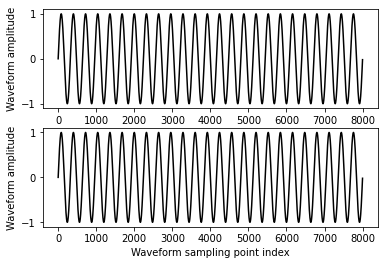

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tool_lib

# 16 kHz sampling rate
sampling_rate = 16000

# generate a 50 Hz sine signal of 0.5s
wav_length = int(sampling_rate * 0.5)
wav_data = np.sin(2 * np.pi * 50 * np.arange(wav_length) / sampling_rate)
wav_data_path = os.path.join(g_workpath, 'data_models/temp_wav_data.wav')

fig = plt.figure()
axis = fig.add_subplot(2,1,1)
axis.plot(wav_data, color='k')
axis.set_ylabel('Waveform amplitude')

# save waveform data using tool_lib.waveFloatToPCMFile
#  the internal scipy API will quantize the np.float32 wav_data as PCM 16bits
#  and save as .wav
tool_lib.waveFloatToPCMFile(wav_data, wav_data_path, sr=sampling_rate)

# load it back using tool_lib.waveReadAsFloat
#  this will load the PCM .wav and convert np.int16 to np.float32 format
sampling_rate_reload, wav_data_reload = tool_lib.waveReadAsFloat(wav_data_path)
axis = fig.add_subplot(2,1,2)
axis.plot(wav_data_reload, color='k')
axis.set_ylabel('Waveform amplitude')
axis.set_xlabel('Waveform sampling point index')


## Sec.1.3 More examples using Data I/O

Let's use the APIs in Sec1.1 to read a Mel-spectrogram file and an F0 file. Both are binary data.

Mel data has shape (466, 80)


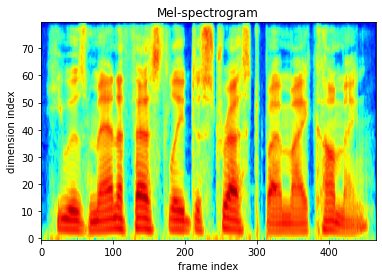

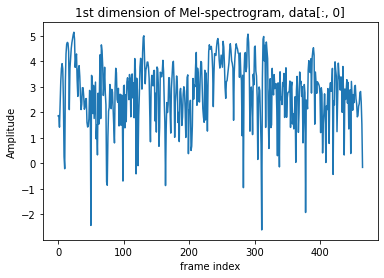

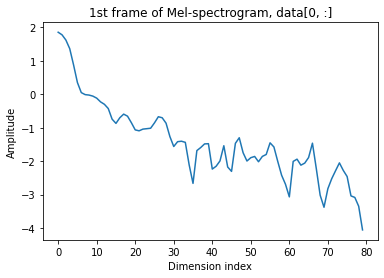

In [ ]:
import tool_lib
import matplotlib
import matplotlib.pyplot as plt

# the mel-spectrogram data matrix has 80 columns
# column corresponds to dimension
# row corresponds to frame
mel_dimension = 80
mel_data_path = os.path.join(g_workpath, 'data_models/acoustic_features/hn_nsf/bdl_arctic_b0474.mfbsp')
mel_data = tool_lib.read_raw_mat(mel_data_path, mel_dimension)
print("Mel data has shape", str(mel_data.shape))

fig = plt.figure()
axis = fig.add_subplot(111)
axis.imshow(mel_data.T, aspect='auto', origin='lower', cmap='jet')
axis.set_xlabel("frame index")
axis.set_ylabel("dimension index")
axis.set_title("Mel-spectrogram")

# plot the 1st dimension of Mel-spectrogram
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(mel_data[:, 0])
axis.set_xlabel("frame index")
axis.set_ylabel("Amplitude")
axis.set_title("1st dimension of Mel-spectrogram, data[:, 0]");

# plot the 100th frame of Mel-spectrogram
fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(mel_data[0, :])
axis.set_xlabel("Dimension index")
axis.set_ylabel("Amplitude")
axis.set_title("1st frame of Mel-spectrogram, data[0, :]");

F0 data has shape (465,)


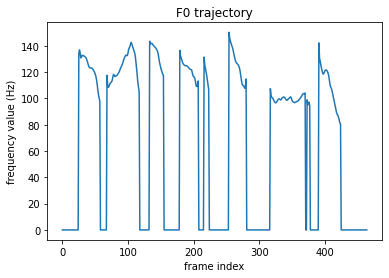

In [ ]:
# example of reading F0
f0_dimension = 1
f0_data_path = os.path.join(g_workpath, 'data_models/acoustic_features/hn_nsf/bdl_arctic_b0474.f0')
f0_data = tool_lib.read_raw_mat(f0_data_path, f0_dimension)
print("F0 data has shape", str(f0_data.shape))

fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot(f0_data)
axis.set_xlabel("frame index")
axis.set_ylabel("frequency value (Hz)")
axis.set_title("F0 trajectory");

`mel_data` is in shape (466, 80), where 466 denotes the number of frames and 80 denotes the feature dimension in each frame.

`f0_data` is in shape (465,), where 465 denotes the number of frames.



Note that, in this hands-on session, mel-spec. and F0 for the same utterance may not have the same number of frames. This is due to the different tools that extract the mel-spec. and F0. Don't worry about that.

# Sec.2 Tensor Format for Pytorch

Recap:
```sh
=========================================================
| Computer OS                                           |
|            ========================================== |
|            | python data I/O                        | |
|            |                 ====================== | |
|            |                 | Pytorch            | | |
| Raw data <---> Numpy array <---->  Pytorch tensor | | |
| e.g. wave, |    np.float32   |      float32       | | |
| MFCC, ...  |                 ====================== | |
|            =========================================| |
=========================================================
```

Conversion from Numpy array to Pytorch tensor is straightforward (see [Pytorch tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#numpy-bridge)).

Here are the conventions in this hands-on session:

* All tensors are in shape **(batchsize, length, dim-1, dim-2, ...)**, where
   * `batchsize`: batch-size of a data batch;
   * `length`: maximum length of data sequences in the batch. It can be the number of frames or number of waveform sampling points;
   * `dim-1`, `dim-2`, ... : dimensions of the feature in one time step;
   

### Sec.2.1 Examples

In [ ]:
# At the begining, let's load packages
from __future__ import absolute_import
from __future__ import print_function
import sys
import numpy as np
import torch

import tool_lib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 5)


In [ ]:
# load mel and F0
mel_dim = 80
mel_data_path = os.path.join(g_workpath, 'data_models/acoustic_features/hn_nsf/slt_arctic_b0474.mfbsp')
input_mel = tool_lib.read_raw_mat(mel_data_path, mel_dim)

# convert it into the required tensor format
input_mel_tensor = torch.tensor(input_mel).unsqueeze(0)

print("Shape of original data: " + str(input_mel.shape))
print("Shape of data as tensor: " + str(input_mel_tensor.shape))

Shape of original data: (554, 80)
Shape of data as tensor: torch.Size([1, 554, 80])


In the example above, the input_mel_tensor has shape (1, 554, 80), where
* 1: this batch has only one data
* 554: the data has 554 frames
* 80: each frame has 80 dimensions

### Sec.2.2 API to plot tensor

Here is one function to plot tensors of shape (batchsize, length, dim)

This will be used to plot the shape of small tensors.

(<Figure size 540x36 with 1 Axes>,
 [<matplotlib.axes._axes.Axes at 0x7f1445338550>])

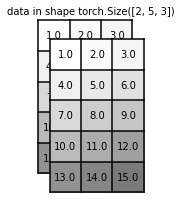

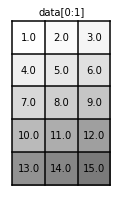

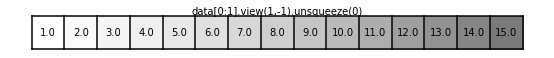

In [ ]:
import plot_lib
import torch
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])


plot_lib.plot_tensor(data.numpy(),
                     color_on_value=True,
                     title='data in shape {:s}'.format(str(data.shape)))
plot_lib.plot_tensor(data[0:1],
                     color_on_value=True,
                     title='data[0:1]')
plot_lib.plot_tensor(data[0:1].view(1, -1).unsqueeze(0),
                     color_on_value=True,
                     title='data[0:1].view(1,-1).unsqueeze(0)')


# Sec.3 Wrappers over Pytorch APIs

This section is for readers who want to check the detailed Pytorch implementations in other notebooks.

Due to the above conventions on Pytorch tensor shape, we need some wrappers over the original Pytorch APIs. For example, the original LSTM API assumes a tensor shape of `(length, batch, dim)` while the original Conv1D API assumes `(batch, dim, length)`.

They are only for demonstration in this hands-on session.






## Sec.3.1 LSTM RNN wrapper

What the RNN wrapper does is illustrated in the picture below
1. Input tensor has shape `(batchsize, length, dim)`
2. Output tensor has shape `(batchsize, length, dim')`
3. The wrapper conducts *permute*, Bi-LSTM transformation, and *permute* back


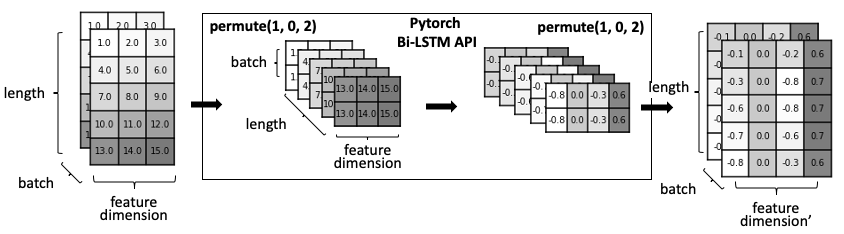

In [ ]:
from IPython.display import Image
Image(filename="/content/figures/fig_c3_1.png")

### Code

In [ ]:
import torch
import torch.nn as torch_nn
import torch.nn.functional as torch_nn_func

class BLSTMLayer(torch_nn.Module):
    """ Wrapper over lstm
    Input tensor:  (batchsize=1, length, dim_in)
    Output tensor: (batchsize=1, length, dim_out)
    We want to keep the length the same

    Define:
        BLSTMLayer(input_dim, output_dim)
    input_dim: dimension of input tensor
    output_dim: dimension of output tensor

    """
    def __init__(self, input_dim, output_dim):
        super(BLSTMLayer, self).__init__()

        # Assume output_dim is the sum of feature dimension in
        # two directions
        if output_dim % 2 != 0:
            print("Output_dim of BLSTMLayer is {:d}".format(output_dim))
            print("BLSTMLayer expects a layer size of even number")
            sys.exit(1)

        # bi-directional LSTM
        self.l_blstm = torch_nn.LSTM(input_dim, output_dim // 2, \
                                     bidirectional=True)
    def forward(self, x):
        # We can also use batch_first=True instead of permute
        # permute to (length, batchsize=1, dim)
        y, _ = self.l_blstm(x.permute(1, 0, 2))
        # permute it back to (batchsize=1, length, dim)
        return y.permute(1, 0, 2)

### Example usage

In [ ]:
import plot_lib

# some configurations
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

#batch_size = data.shape[0]
#frame_length = data.shape[1]

input_feature_dim = data.shape[2]
output_feature_dim = 4

with torch.no_grad():
    # create input data
    input_data = data

    # create a blstm RNN layer
    torch.manual_seed(1)
    l_blstm = BLSTMLayer(input_feature_dim, output_feature_dim)

    # compute output data
    output_data = l_blstm(input_data)

The input tensor is in shape (2, 5, 3): 2 data sequences in one batch, 5 time steps, and 3 dimensions per step. The Bi-LSTM layer transforms the input tensor into an output tensor of shape (2, 5, 4).

(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f588e58a5d0>])

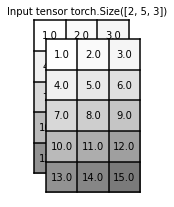

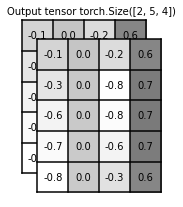

In [ ]:
# input tensor
plot_lib.plot_tensor(input_data, color_on_value=True,
                     title='Input tensor {:s}'.format(str(input_data.shape)))

# output tensor
plot_lib.plot_tensor(output_data, color_on_value=True,
                     title='Output tensor {:s}'.format(str(output_data.shape)))

### A note on Permute

To make the semantics constant, the above wrapper uses `permute` to manipulate the tensors.

Here we illustrate the basic usages of `permute` through examples.

(<Figure size 187.2x115.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f588e02d4d0>])

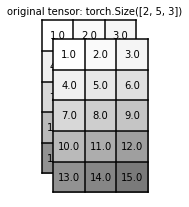

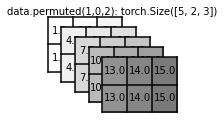

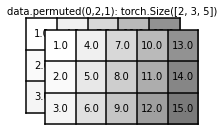

In [ ]:
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

# original tensor
plot_lib.plot_tensor(data, color_on_value=True,
                     title='original tensor: {:s}'.format(str(data.shape)))

# permute by (1, 0, 2): (batch, length, dim) -> (length, batch, dim)
plot_lib.plot_tensor(data.permute(1, 0, 2), color_on_value=True,
                     title='data.permuted(1,0,2): {:s}'.format(str(input_data.permute(1, 0, 2).shape)))

# permute by (0, 2, 1): (batch, length, dim) -> (batch, dim, length)
plot_lib.plot_tensor(data.permute(0, 2, 1), color_on_value=True,
                     title='data.permuted(0,2,1): {:s}'.format(str(input_data.permute(0, 2, 1).shape)))

## Sec.3.2 1D CNN wrapper

Here are the conventions for 1D conv that keeps the length of input data:
1. It receives input tensor in shape (batchsize, length, dim)
2. It produces output tensor in shape (batchsize, length', dim')

Here we focus on the case where `length` is the same for input and output tensors.

This is merely for demonstration in this hands-on session, even though the wrapper can change the `length` as well. Also, the wrapper may not inefficient when training a large model on big data.

Picture below shows the wrapper over Pytorch.

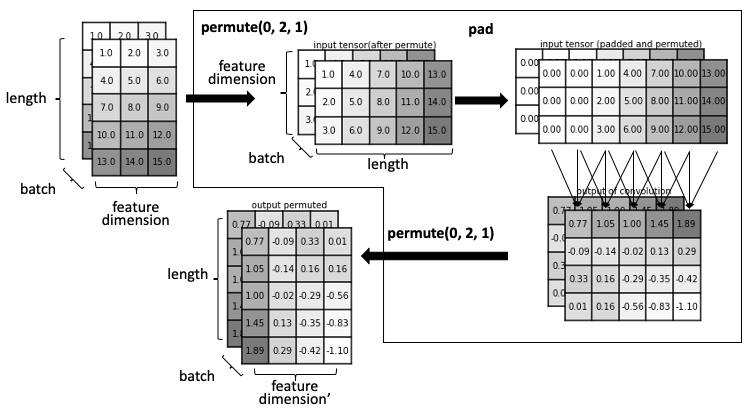

In [ ]:
from IPython.display import Image
Image(filename="/content/figures/fig_c4_1.png")

### Code

In [ ]:
import torch
import torch.nn as torch_nn
import torch.nn.functional as torch_nn_func

class Conv1dKeepLength(torch_nn.Conv1d):
    """ Wrapper for 1D conv
    Input tensor:  (batchsize, length, dim_in)
    Output tensor: (batchsize, length, dim_out)
    """
    def __init__(self, input_dim, output_dim, dilation_s, kernel_s,
                 causal = False, stride = 1, groups=1, bias=True, \
                 tanh = True, pad_mode='constant'):
        super(Conv1dKeepLength, self).__init__(
            input_dim, output_dim, kernel_s, stride=1,
            padding = 0, dilation = dilation_s, groups=groups, bias=bias)

        self.pad_mode = pad_mode
        self.causal = causal

        # padding size
        # input & output length will be the same
        if self.causal:
            # left pad to make the convolution causal
            self.pad_le = dilation_s * (kernel_s - 1)
            self.pad_ri = 0
        else:
            # pad on both sizes
            self.pad_le = dilation_s * (kernel_s - 1) // 2
            self.pad_ri = dilation_s * (kernel_s - 1) - self.pad_le

        # activation functions
        if tanh:
            self.l_ac = torch_nn.Tanh()
        else:
            self.l_ac = torch_nn.Identity()

    def forward(self, data):
        # https://github.com/pytorch/pytorch/issues/1333
        # permute to (batchsize=1, dim, length)
        # add one dimension as (batchsize=1, dim, ADDED_DIM, length)
        # pad to ADDED_DIM
        # squeeze and return to (batchsize=1, dim, length+pad_length)
        x = torch_nn_func.pad(data.permute(0, 2, 1).unsqueeze(2), \
                              (self.pad_le, self.pad_ri,0,0), \
                              mode = self.pad_mode).squeeze(2)
        # tanh(conv1())
        # permmute back to (batchsize=1, length, dim)
        output = self.l_ac(super(Conv1dKeepLength, self).forward(x))
        return output.permute(0, 2, 1)

### Example usage

(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f588e667a90>])

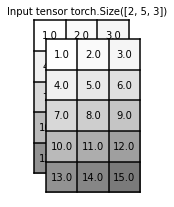

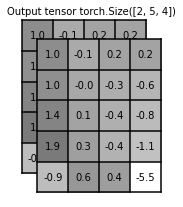

In [ ]:
import plot_lib
# Try one sample

# input data
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

#batch_size = data.shape[0]
#frame_length = data.shape[1]

input_feature_dim = data.shape[2]
output_feature_dim = 4
kernel_size = 3
dilation_size = 1

with torch.no_grad():
    # create input data
    input_data = data
    torch.manual_seed(1)

    # create a conv1d layer (non-causal, dilation=1, kernel_s=3)
    l_conv1d = Conv1dKeepLength(
        input_feature_dim, output_feature_dim,
        dilation_s=dilation_size, kernel_s=kernel_size,
        tanh=False)

    # compute output data
    output_data = l_conv1d(input_data)


# input tensor
plot_lib.plot_tensor(input_data, color_on_value=True,
                     title="Input tensor {:s}".format(str(data.shape)))

# output tensor
plot_lib.plot_tensor(output_data, color_on_value=True,
                     title="Output tensor {:s}".format(str(output_data.shape)))


### Walk through the wrapper

Here are the detailed steps when doing non-causal convolution:

(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f588da3f550>])

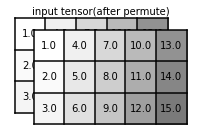

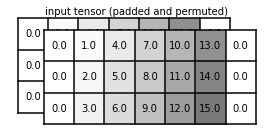

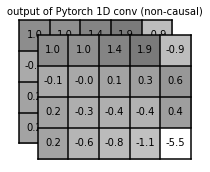

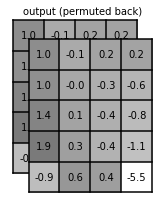

In [ ]:
# step1. permute
x = data.permute(0, 2, 1)
plot_lib.plot_tensor(x, color_on_value=True,
                     title='input tensor(after permute)')

# step2. padding
# For non-casual CNN, we pad on both left and right side
pad_le = dilation_size * (kernel_size - 1) // 2
pad_ri = dilation_size * (kernel_size - 1) - pad_le

x = torch_nn_func.pad(x.unsqueeze(2),
                      (pad_le, pad_ri,0,0), mode = 'constant').squeeze(2)
plot_lib.plot_tensor(x, color_on_value=True,
                     title='input tensor (padded and permuted)')

# step3. convolution (call the pytorch API)
with torch.no_grad():
    y = l_conv1d.l_ac(super(Conv1dKeepLength, l_conv1d).forward(x))
plot_lib.plot_tensor(y, color_on_value=True,
                     title='output of Pytorch 1D conv (non-causal)')

# step4. permute back
y = y.permute(0, 2, 1)
plot_lib.plot_tensor(y, color_on_value=True,
                     title='output (permuted back)')


Here are the steps for causal convolution

(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f588e347110>])

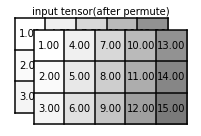

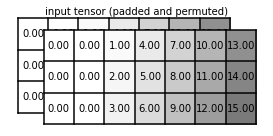

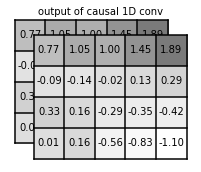

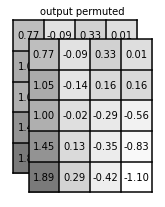

In [ ]:
# In the case of causal convolution

# step1. permute
x2 = data.permute(0, 2, 1)
plot_lib.plot_tensor(x2, color_on_value=True,
                     title='input tensor(after permute)', deci_width=2)

# step2. padding
# For casual CNN, we pad on the left hand side only
pad_le = dilation_size * (kernel_size - 1)
pad_ri = 0

x2 = torch_nn_func.pad(x2.unsqueeze(2),
                      (pad_le, pad_ri,0,0), mode = 'constant').squeeze(2)
plot_lib.plot_tensor(x2, color_on_value=True,
                     title='input tensor (padded and permuted)', deci_width=2)

# step3. convolution
with torch.no_grad():
    y2 = l_conv1d.l_ac(super(Conv1dKeepLength, l_conv1d).forward(x2))
plot_lib.plot_tensor(y2, color_on_value=True,
                     title='output of causal 1D conv', deci_width=2)

# step4. permute back
y2 = y2.permute(0, 2, 1)
plot_lib.plot_tensor(y2, color_on_value=True,
                     title='output permuted', deci_width=2)


Notice how padding the input tensors are padded in different ways.

We can verify the computation using the causal-convolution example

Let's compute the output[0, 1, 1]


(<Figure size 36x36 with 1 Axes>,
 [<matplotlib.axes._axes.Axes at 0x7f588dc4d510>])

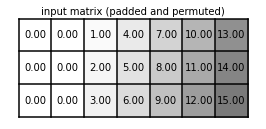

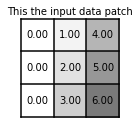

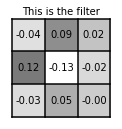

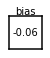

In [ ]:
# We can plot the filter and bias of the 1D conv layer
# We will visualize the 1D conv filters later in this hands-on session

# Let's verify using the 1st data in the batch
tmp_input = x2[0:1]
plot_lib.plot_tensor(tmp_input, color_on_value=True,
                     title='input matrix (padded and permuted)', deci_width=2)

# Let's compute the value at output[0, output_time_step, output_channel_idx]
output_channel_idx = 1
output_time_step = 1

# Get the filter
cnn_weight = l_conv1d.weight.detach()
conv_filter_1 = cnn_weight[output_channel_idx:output_channel_idx+1]

# Get the bias
conv_bias_1 = l_conv1d.bias.detach()[output_channel_idx:output_channel_idx+1]

# Get the data patch
data_patch = tmp_input[:, :, output_time_step:output_time_step+3]
output_value = torch.sum(data_patch * conv_filter_1) + conv_bias_1

print("Let's compute the output[0, {:d}, {:d}]".format(
    output_time_step,
    output_channel_idx))

plot_lib.plot_tensor(data_patch, color_on_value=True,
                     title='This the input data patch', deci_width=2)
plot_lib.plot_tensor(conv_filter_1, color_on_value=True,
                     title='This is the filter', deci_width=2)
plot_lib.plot_tensor(conv_bias_1.unsqueeze(0).unsqueeze(0),
                     color_on_value=True,
                     title='bias', deci_width=2)


Output_value = sum(Data path $\odot$ filter) + bias

In [ ]:
# data_path
print("Manually computed value:", output_value)
print("Output from API:", y2[0, output_time_step, output_channel_idx])

Manually computed value: tensor([-0.1417])
Output from API: tensor(-0.1417)


In [ ]:
# If you are interested, you can plot other filter maps too
if False:
  cnn_weight = l_conv1d.weight.detach()
  colors = ['Purples', 'Oranges', 'Greens', 'Blues']
  for feat_map_idx in range(cnn_weight.shape[0]):
      plot_lib.plot_tensor(
          cnn_weight[feat_map_idx:feat_map_idx+1],
          color_on_value=False,
          colorgrad_x=False, colorgrad_y=False,
          colormap=colors[feat_map_idx], alpha=1.0,
          title='filter for channel {:d}'.format(feat_map_idx+1),
          deci_width=2)

  plot_lib.plot_tensor(
      l_conv1d.bias.detach().unsqueeze(0).unsqueeze(2),
      color_on_value=False, colorgrad_x=False,
      colorgrad_y=False, colormap="Greys", alpha=1.0,
      title = 'cnn bias', deci_width=2)

### A note on Padding

Pytorch official doc on `Padding` is not digestible.

Here we use examples to illustrate the basic usages.

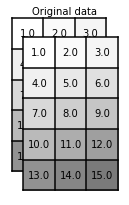

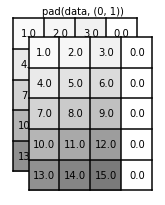

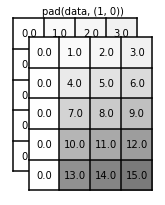

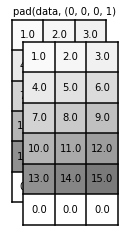

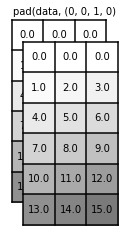

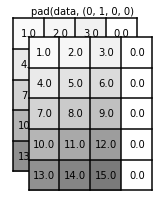

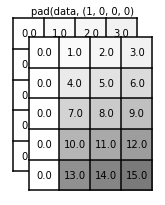

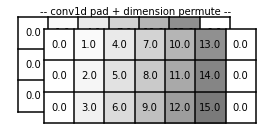

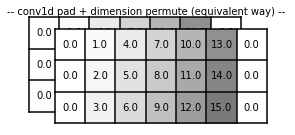

In [ ]:
import torch
import torch.nn as torch_nn
import torch.nn.functional as torch_nn_func

# Let's try pad in different configurations
pad_size = 1
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])


import plot_lib
def show_data(data, message):

    fig, axis = plot_lib.plot_tensor(data, color_on_value=True)
    fig.text(0.5, 0.98, message, ha='center')

# original data
show_data(data, 'Original data')

# try padding in different configs
data2 = torch_nn_func.pad(data, (0, pad_size))
show_data(data2, 'pad(data, (0, 1))')

data2 = torch_nn_func.pad(data, (pad_size, 0))
show_data(data2, 'pad(data, (1, 0))')

data2 = torch_nn_func.pad(data, (0, 0, 0, pad_size))
show_data(data2, 'pad(data, (0, 0, 0, 1)')

data2 = torch_nn_func.pad(data, (0, 0, pad_size, 0))
show_data(data2, 'pad(data, (0, 0, 1, 0)')

data2 = torch_nn_func.pad(data, (0, pad_size, 0, 0))
show_data(data2, 'pad(data, (0, 1, 0, 0)')

data2 = torch_nn_func.pad(data, (pad_size, 0, 0, 0))
show_data(data2, 'pad(data, (1, 0, 0, 0)')

# Try the padding method used in Conv1DKeepLength
# 1. permute(0, 2, 1): transposes the data from (batchsize, length, dim) to (batchsize, dim, length)
# 2. pad: pad the tensor to (batchsize, dim, length + pad_length)
data2 = torch_nn_func.pad(data.permute(0, 2, 1), (pad_size, pad_size))
show_data(data2, '-- conv1d pad + dimension permute -- ')

# here is an equivalent way
data2 = torch_nn_func.pad(data.permute(0, 2, 1).unsqueeze(2), (pad_size, pad_size,0,0)).squeeze(2)
show_data(data2, '-- conv1d pad + dimension permute (equivalent way) -- ')

That's all for this notebook.

# License
```
BSD 3-Clause License

Copyright (c) 2022, Xin Wang, National Institute of Informatics
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```

# ACKNOWLEDGEMENT
This work is partially supported by JST CREST Grants (JPMJCR18A6 and JPMJCR20D3), MEXT KAKENHI Grants (21K17775, 21H04906).